<a href="https://colab.research.google.com/github/KevinKato123/NYU-summer-2020/blob/master/nb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
* [go here for live instructions](https://docs.google.com/document/d/1Xtir6QuaGYkSYsbpLFpuMwUUNNEGsWmtLhDk1k3bR8g/edit?usp=sharing)

# Math

## Linear algebra
* Physics student perspective of vector: Lines in space, with a direction and maginitude with a possible felon of stealing the moon.
* CS student perspective of vector: Lists of numbers
* scalar: A number that scales vectors
* 2 fundamental things we do to vectors:
  - Add Vectors
  - Scale Vectors

* Give an example of each of the above



# Ethics
* [Algorithm cuts healthcare](https://www.theverge.com/2018/3/21/17144260/healthcare-medicaid-algorithm-arkansas-cerebral-palsy)
* [Youtube and conspiracy theories](https://www.nytimes.com/2019/02/19/technology/youtube-conspiracy-stars.html)
* [Biased facial recognition](https://www.theverge.com/2019/1/25/18197137/amazon-rekognition-facial-recognition-bias-race-gender)



# Case study
* Topic: TODO
* Link: TODO
* One sentence summary: TODO
* Who was harmed?: TODO
* Notes:
 - TODO
 - TODO
 - TODO
* Thoughts:
  - TODO
  - TODO
  - TODO
* Questions:
  - TODO
  - TODO
  - TODO

# Coding

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 30.4 MB/s 
     |████████████████████████████████| 4.9 MB 52.7 MB/s 
     |████████████████████████████████| 431 kB 67.5 MB/s 
     |████████████████████████████████| 1.3 MB 58.4 MB/s 
     |████████████████████████████████| 212 kB 69.1 MB/s 
     |████████████████████████████████| 115 kB 67.0 MB/s 
     |████████████████████████████████| 120 kB 74.1 MB/s 
     |████████████████████████████████| 127 kB 61.7 MB/s 
     |████████████████████████████████| 6.6 MB 57.1 MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *
import numpy as np
import random
matplotlib.rc('image', cmap='Greys_r')

In [ ]:
num_rows = 200
num_cols = 100
vecs = [random.choices(range(5), k=num_cols)
 for _ in range(num_rows)]
print(len(vecs))

200


In [ ]:
def s_multiply(vec,scalar):
  i = 0 
  new_vec = [None] * len(vec)
  for i, num in enumerate(vec):
    new_vec[i] = scalar * num
  return new_vec

In [ ]:
def s_add(vec1, vec2):
  new_vec = [None] * len(vec1)
  for i, (num1, num2) in enumerate(zip(vec1, vec2)):
    new_vec[i] = num1 + num2
  return new_vec

In [ ]:
a = [2,4,6]
b = [1,3,5]
print(list(enumerate(zip(a,b))))

# MNIST

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#9) [Path('cleaned.csv'),Path('item_list.txt'),Path('trained_model.pkl'),Path('models'),Path('valid'),Path('labels.csv'),Path('export.pkl'),Path('history.csv'),Path('train')]

In [ ]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [ ]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [ ]:

im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


## First Try: Pixel Similarity

In [ ]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

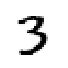

In [ ]:
show_image(three_tensors[1]);